# Predicting car price using LinearRegression 

## Case 1 : Applying get_dummies() on categorial variables and considering all the features

### model performance good on train set (overfitting) but fails on test set (curse of dimensionality)

In [29]:
import pandas as pd

In [30]:
import numpy as np

In [31]:
import seaborn as sns

In [32]:
import matplotlib.pyplot as plt

In [33]:
from sklearn.preprocessing import Imputer,LabelEncoder,OneHotEncoder

In [34]:
from sklearn.model_selection import train_test_split as ms_train_test_split

In [35]:
from sklearn.cross_validation import train_test_split as cv_train_test_split

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
%matplotlib inline 

In [52]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',header=0)

In [53]:
features = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [54]:
data.columns = features

In [55]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [56]:
data.index[data['price'] == '?']

Int64Index([8, 43, 44, 128], dtype='int64')

In [57]:
data.drop(data.index[[8,43,44,128]],axis=0,inplace=True)

In [58]:
data.replace('?',np.NaN,inplace=True)

In [59]:
to_float_cols = ['normalized_losses','curb_weight','engine_size','bore','stroke','horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [60]:
for c in to_float_cols:
    data[c] = data[[c]].apply(pd.to_numeric,axis=1,errors='coerce')
    #data[c] = pd.to_numeric(data[c], errors='coerce')
    #data[c] = data[c].convert_objects(convert_numeric=True)

In [61]:
#data = data.apply(pd.to_numeric, axis=1,errors='coerce')

In [64]:
#data1.fillna(data1.median,inplace=True)
data = data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 203
Data columns (total 26 columns):
symboling            200 non-null int64
normalized_losses    200 non-null float64
make                 200 non-null object
fuel_type            200 non-null object
aspiration           200 non-null object
num_of_doors         200 non-null object
body_style           200 non-null object
drive_wheels         200 non-null object
engine_location      200 non-null object
wheel_base           200 non-null float64
length               200 non-null float64
width                200 non-null float64
height               200 non-null float64
curb_weight          200 non-null int64
engine_type          200 non-null object
num_of_cylinders     200 non-null object
engine_size          200 non-null int64
fuel_system          200 non-null object
bore                 200 non-null float64
stroke               200 non-null float64
compression_ratio    200 non-null float64
horsepower           200 non-

In [65]:
data.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,129.020000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,3.335800,3.262650,10.170100,103.005000,5115.000000,25.200000,30.705000,13205.690000
std,1.248557,35.419377,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,0.271629,0.314792,4.014163,37.621161,480.289904,6.432487,6.827227,7966.982558
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,100.250000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,3.150000,3.117500,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,128.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5150.000000,24.000000,30.000000,10270.000000
75%,2.000000,161.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,3.602500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.750000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [66]:
data.corr(method='pearson')

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.452557,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.106724,0.023782,-0.181073,0.072979,0.282484,-0.030158,0.041248,-0.083327
normalized_losses,0.452557,1.000000,0.051106,0.163820,0.207871,-0.335627,0.260506,0.295718,0.088838,0.119073,-0.094155,0.359907,0.173408,-0.354700,-0.316695,0.319443
wheel_base,-0.529145,0.051106,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.483262,0.139134,0.249689,0.378333,-0.361143,-0.480029,-0.552211,0.589147
length,-0.364511,0.163820,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.594834,0.116862,0.159203,0.574193,-0.288781,-0.667658,-0.700186,0.691044
width,-0.237262,0.207871,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.540265,0.181655,0.189008,0.611416,-0.248912,-0.638155,-0.684700,0.752795
height,-0.542261,-0.335627,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.148634,-0.096561,0.259526,-0.081723,-0.312485,-0.057087,-0.111568,0.137284
curb_weight,-0.234743,0.260506,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.631277,0.165820,0.156444,0.755410,-0.278336,-0.750390,-0.795515,0.834420
engine_size,-0.112069,0.295718,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.538310,0.195917,0.029005,0.817880,-0.256962,-0.651002,-0.679877,0.872337
bore,-0.106724,0.088838,0.483262,0.594834,0.540265,0.148634,0.631277,0.538310,1.000000,-0.041049,-0.002119,0.557054,-0.227062,-0.602992,-0.608302,0.536795
stroke,0.023782,0.119073,0.139134,0.116862,0.181655,-0.096561,0.165820,0.195917,-0.041049,1.000000,0.184679,0.082244,-0.062949,-0.052353,-0.050303,0.082924


In [67]:
#sns.heatmap(data[to_float_cols].astype(float))

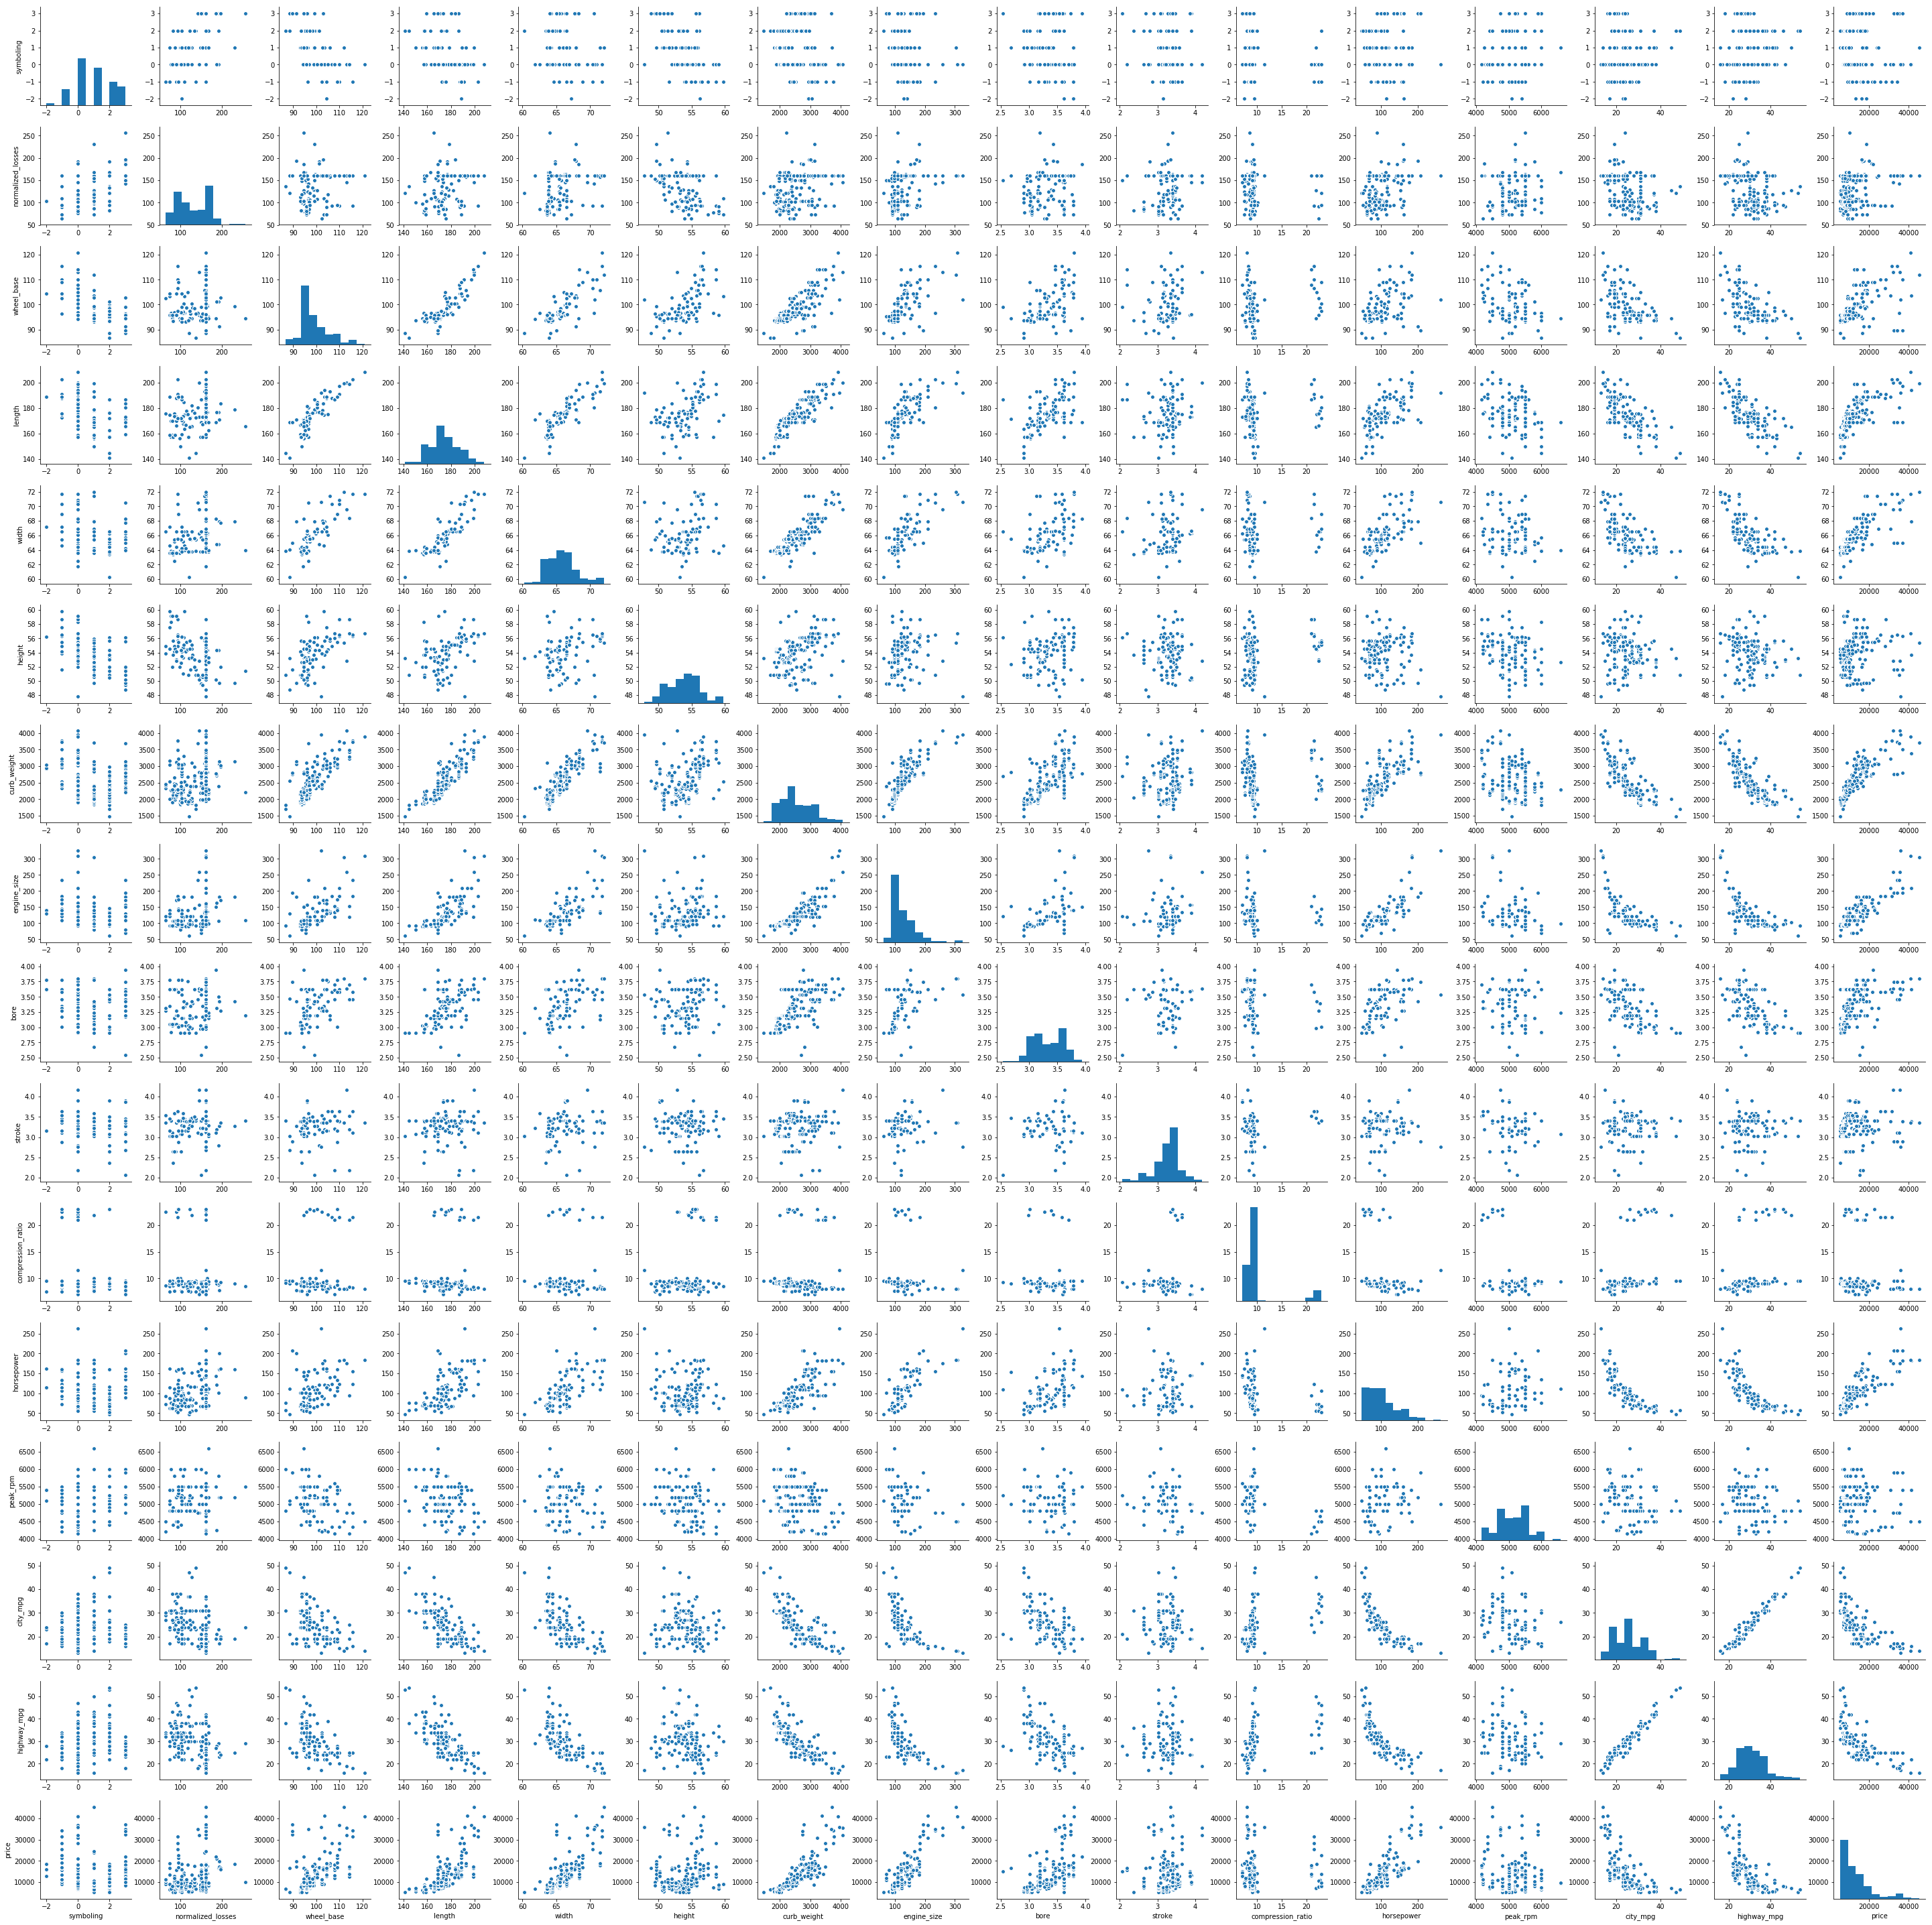

In [199]:
 sns.pairplot(data)

C:\Users\Satish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Satish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


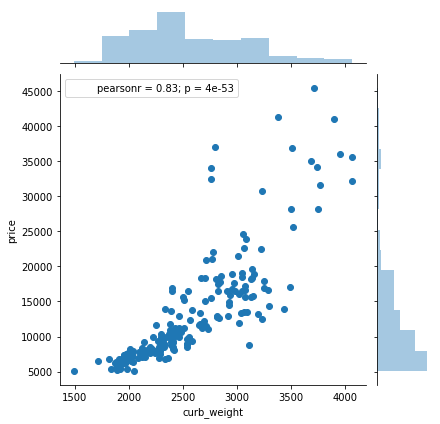

In [69]:
sns.jointplot( data.curb_weight, data.price )

Observe the graph:

pearson correlation is 0.78
Observe the p-value. Here we are testing whether correlation between TV and Radio is zero (Null hypothesis) or not(alternative hypothesis). Since p-value is insignificant, we reject Null hypothesis.

In [70]:
data.curb_weight.corr( data.price )

0.8344204348498461

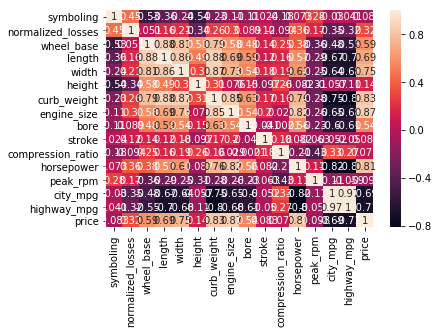

In [71]:
sns.heatmap( data.corr(), annot=True)

In [72]:
data.corr()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.452557,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.106724,0.023782,-0.181073,0.072979,0.282484,-0.030158,0.041248,-0.083327
normalized_losses,0.452557,1.000000,0.051106,0.163820,0.207871,-0.335627,0.260506,0.295718,0.088838,0.119073,-0.094155,0.359907,0.173408,-0.354700,-0.316695,0.319443
wheel_base,-0.529145,0.051106,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.483262,0.139134,0.249689,0.378333,-0.361143,-0.480029,-0.552211,0.589147
length,-0.364511,0.163820,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.594834,0.116862,0.159203,0.574193,-0.288781,-0.667658,-0.700186,0.691044
width,-0.237262,0.207871,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.540265,0.181655,0.189008,0.611416,-0.248912,-0.638155,-0.684700,0.752795
height,-0.542261,-0.335627,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.148634,-0.096561,0.259526,-0.081723,-0.312485,-0.057087,-0.111568,0.137284
curb_weight,-0.234743,0.260506,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.631277,0.165820,0.156444,0.755410,-0.278336,-0.750390,-0.795515,0.834420
engine_size,-0.112069,0.295718,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.538310,0.195917,0.029005,0.817880,-0.256962,-0.651002,-0.679877,0.872337
bore,-0.106724,0.088838,0.483262,0.594834,0.540265,0.148634,0.631277,0.538310,1.000000,-0.041049,-0.002119,0.557054,-0.227062,-0.602992,-0.608302,0.536795
stroke,0.023782,0.119073,0.139134,0.116862,0.181655,-0.096561,0.165820,0.195917,-0.041049,1.000000,0.184679,0.082244,-0.062949,-0.052353,-0.050303,0.082924


In [88]:
data = pd.get_dummies(data,drop_first=True)

In [91]:
data.shape

(200, 65)

In [74]:
y = data.price

In [75]:
X = data.drop(['price'],axis=1)

In [76]:
X_train,X_test,y_train,y_test = ms_train_test_split(X,y,test_size=0.3,random_state=0)

In [92]:
X_test.shape

(60, 64)

In [77]:
regressor = LinearRegression()

In [78]:
model = regressor.fit(X_train,y_train)

In [79]:
y_predict = model.predict(X_test)

In [80]:
model.coef_

array([-3.51034650e+02,  7.11085762e-01,  1.80646799e+02, -1.00261982e+02,
        5.33536762e+02, -5.47319946e+02,  1.03892697e+01,  2.38941897e+02,
       -1.90223241e+04, -2.97290089e+03, -7.27637994e+02, -3.21647412e+01,
        1.97690459e+00, -2.06072767e+02,  2.40623609e+02,  5.97997461e+03,
        1.59894216e+04,  7.29401540e+02, -1.80525460e+03,  3.96665657e+03,
        1.81300048e+03, -6.16495273e+03,  2.73773728e+03,  5.45411374e+03,
        1.89629645e-10, -2.57522611e+03,  2.48929286e+03, -1.84292107e+03,
       -1.43738542e+03,  1.32338034e+04,  7.15451807e+02,  7.70129965e+03,
        1.91204126e+03,  1.96020137e+03,  2.53944154e+03,  7.17171439e+03,
       -6.58202807e+03,  1.66824379e+03,  9.87702389e+02, -2.60029106e+03,
       -3.93494812e+03, -2.70450601e+03, -2.57815700e+03, -9.83025147e+02,
       -1.93208627e+03,  5.45696821e-12, -1.84292107e+03, -2.92129837e+03,
        1.91204126e+03, -1.58333344e+03,  1.75028052e+04,  1.13643164e+04,
        1.92000999e+04,  

In [81]:
model.intercept_

9905.770632683007

In [86]:
model.score(X_train,y_train)

0.9742831314683049

In [82]:
model.score(X_test,y_test)

0.5788610110418025

In [83]:
print("the mean squared eror: %f "%(mean_squared_error(y_test,y_predict)))

the mean squared eror: 29703210.521368 


Analyze RMSE

In [84]:
np.sqrt(mean_squared_error(y_predict,y_test ))

5450.065185056778